# OS module is to Get Access for the Window Files

In [1]:
import os
os.chdir("C:/Users/abhis/Downloads/")

# Importing all the Libraries for doing Analysis on the data

In [2]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Reading File to form Dataset

In [3]:
data = pd.read_csv("penguins_size.csv")

# Data.head Means show First 5 Columns

In [4]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Finding The Unique Values for categorical columns

In [5]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
data.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
data.sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

# Names Of All The Columns And Shape of dataframe

In [8]:
print(data.columns)
print(data.shape)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
(344, 7)


# Finding All The Missing Values

In [9]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


# Fill the Missing Value with the Mean Value for the Columns

In [10]:
data.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [11]:
data.loc[data["sex"].isin(["."])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
data = data.drop(336)

"""
or we can apply this
data.drop(data[data['sex']=='.'].index, inplace=True)
"""

"\nor we can apply this\ndata.drop(data[data['sex']=='.'].index, inplace=True)\n"

In [13]:
# Handling Missing Data by Filling Mean Values from the while Column
data['culmen_length_mm'].fillna(value=data["culmen_length_mm"].mean(), inplace=True)
data['culmen_depth_mm'].fillna(value=data["culmen_depth_mm"].mean(), inplace=True)
data['flipper_length_mm'].fillna(value=data["flipper_length_mm"].mean(), inplace=True)
data['body_mass_g'].fillna(value=data["body_mass_g"].mean(), inplace=True)
data['sex'] = data['sex'].fillna('FEMALE')

In [14]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.920235,17.155425,200.868035,4199.780059,FEMALE
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.920235,17.155425,200.868035,4199.780059,FEMALE
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,FEMALE


In [15]:
data.dropna(inplace = True)

In [16]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
data.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


<AxesSubplot:xlabel='culmen_length_mm', ylabel='Density'>

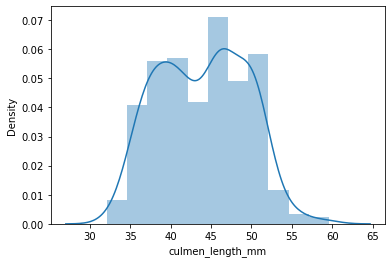

In [19]:
sns.distplot(data.culmen_length_mm)

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='Density'>

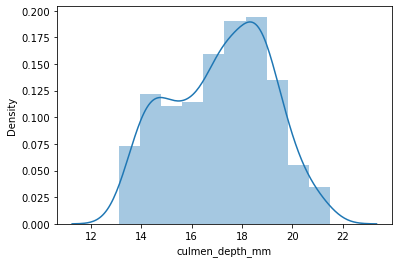

In [20]:
sns.distplot(data.culmen_depth_mm)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

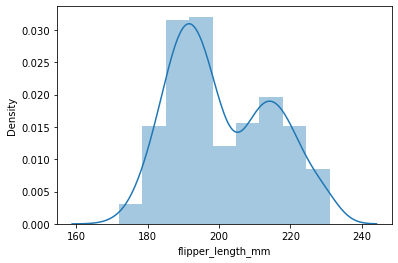

In [21]:
sns.distplot(data.flipper_length_mm)

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

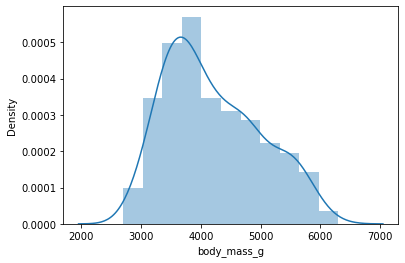

In [22]:
sns.distplot(data.body_mass_g)

<AxesSubplot:xlabel='sex', ylabel='count'>

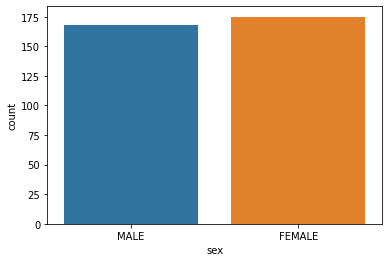

In [23]:
sns.countplot(data.sex)

<AxesSubplot:xlabel='species', ylabel='count'>

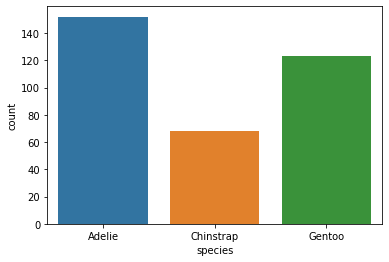

In [24]:
sns.countplot(data.species)

<AxesSubplot:xlabel='island', ylabel='count'>

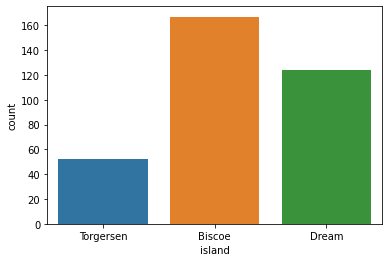

In [25]:
sns.countplot(data.island)

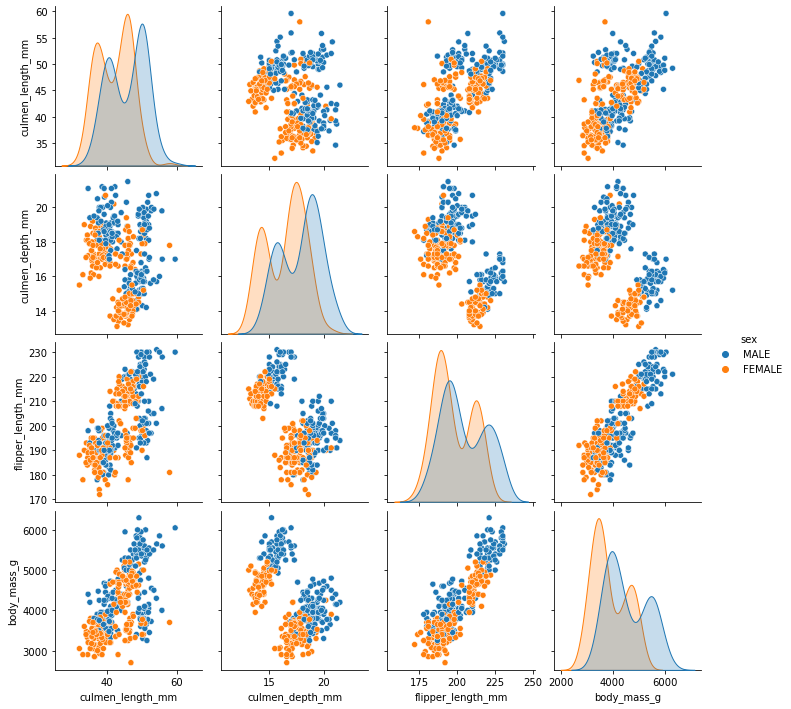

In [26]:
sns.pairplot(data,hue = "sex")

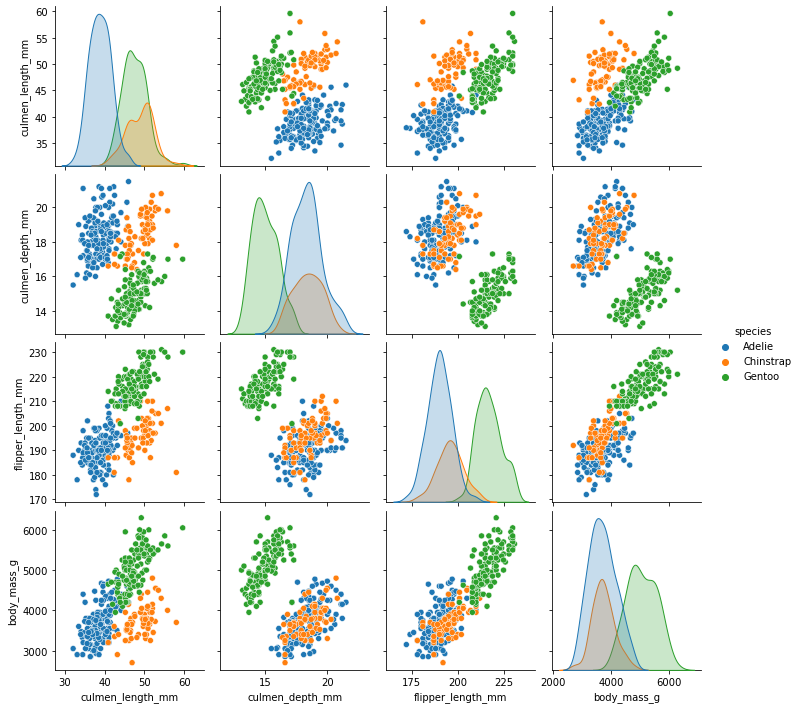

In [27]:
sns.pairplot(data,hue = "species")

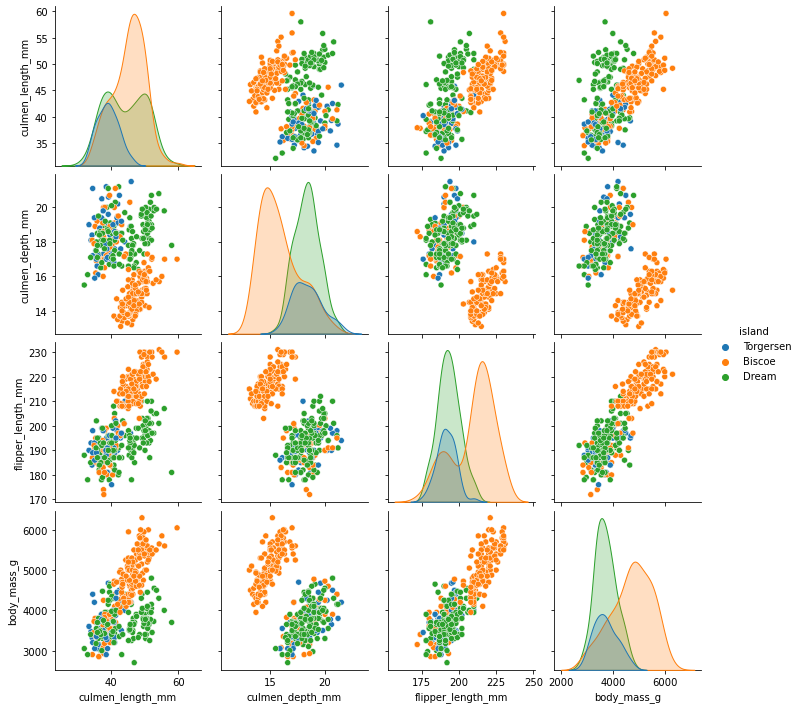

In [28]:
sns.pairplot(data,hue = "island")

In [29]:
data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235015,0.657102,0.595476
culmen_depth_mm,-0.235015,1.000000,-0.582964,-0.470963
flipper_length_mm,0.657102,-0.582964,1.000000,0.870956
body_mass_g,0.595476,-0.470963,0.870956,1.000000


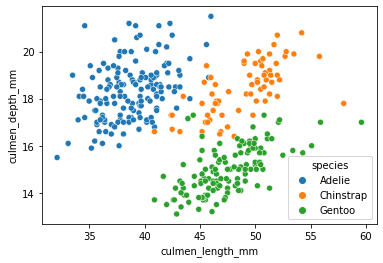

In [30]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "culmen_depth_mm", hue= "species")
plt.show()

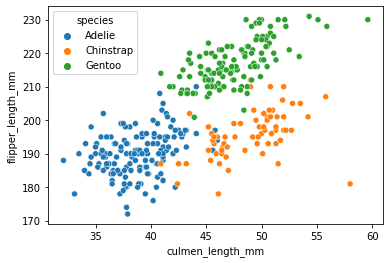

In [31]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "flipper_length_mm", hue= "species")
plt.show()

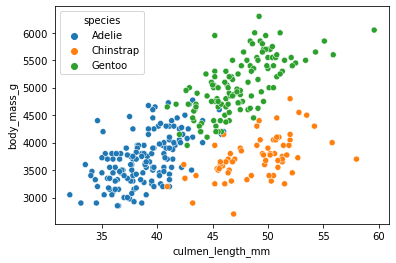

In [32]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "body_mass_g", hue= "species")
plt.show()

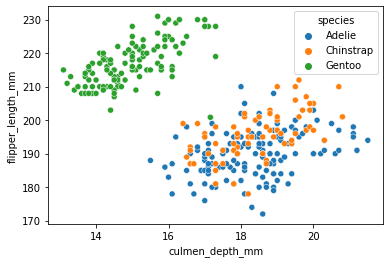

In [33]:
sns.scatterplot(data = data, x = "culmen_depth_mm", y = "flipper_length_mm", hue= "species")
plt.show()

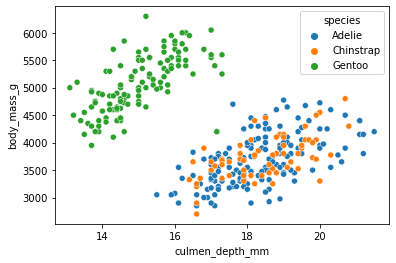

In [34]:
sns.scatterplot(data = data, x = "culmen_depth_mm", y = "body_mass_g", hue= "species")
plt.show()

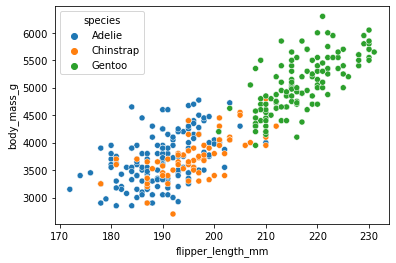

In [35]:
sns.scatterplot(data = data, x = "flipper_length_mm", y = "body_mass_g", hue= "species")
plt.show()

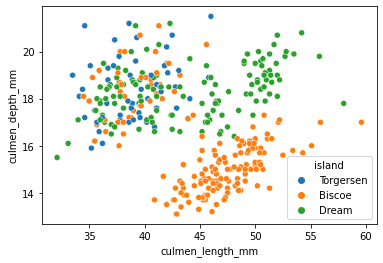

In [36]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "culmen_depth_mm", hue= "island")
plt.show()

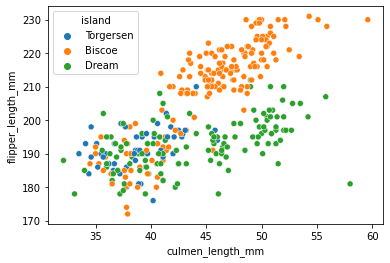

In [37]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "flipper_length_mm", hue= "island")
plt.show()

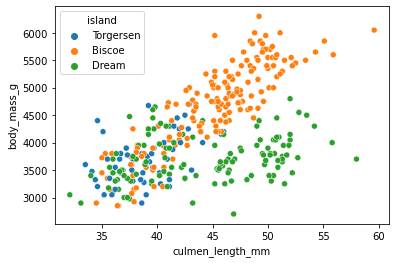

In [38]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "body_mass_g", hue= "island")
plt.show()

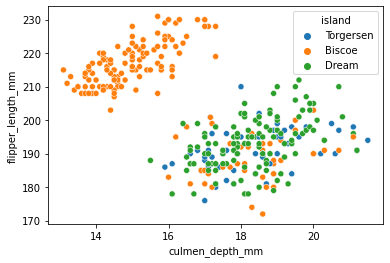

In [39]:
sns.scatterplot(data = data, x = "culmen_depth_mm", y = "flipper_length_mm", hue= "island")
plt.show()

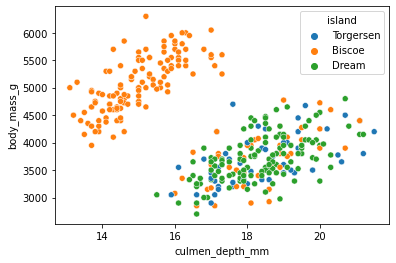

In [40]:
sns.scatterplot(data = data, x = "culmen_depth_mm", y = "body_mass_g", hue= "island")
plt.show()

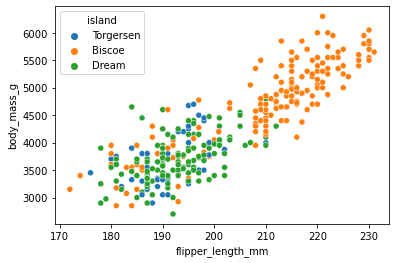

In [41]:
sns.scatterplot(data = data, x = "flipper_length_mm", y = "body_mass_g", hue= "island")
plt.show()

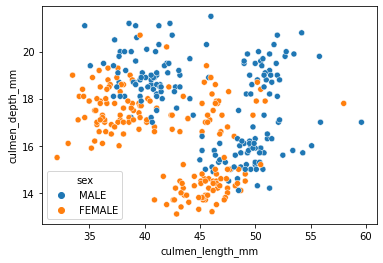

In [42]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "culmen_depth_mm", hue= "sex")
plt.show()

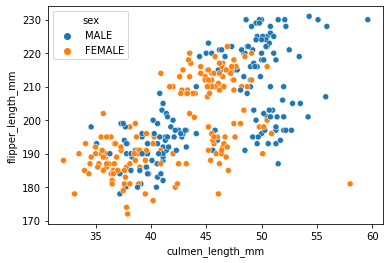

In [43]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "flipper_length_mm", hue= "sex")
plt.show()

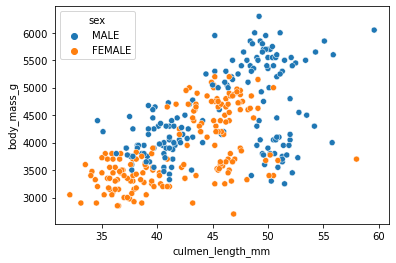

In [44]:
sns.scatterplot(data = data, x = "culmen_length_mm", y = "body_mass_g", hue= "sex")
plt.show()

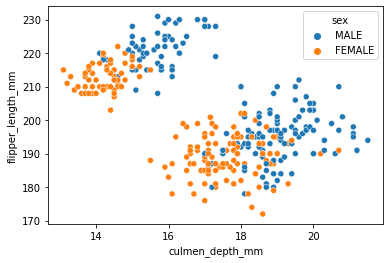

In [45]:
sns.scatterplot(data = data, x = "culmen_depth_mm", y = "flipper_length_mm", hue= "sex")
plt.show()

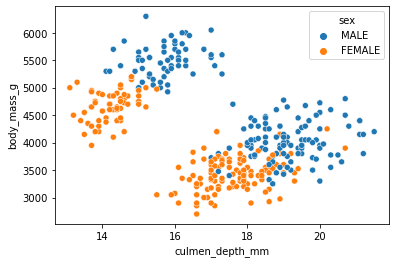

In [46]:
sns.scatterplot(data = data, x = "culmen_depth_mm", y = "body_mass_g", hue= "sex")
plt.show()

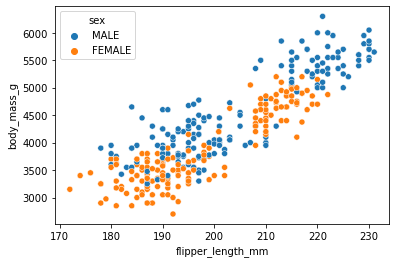

In [47]:
sns.scatterplot(data = data, x = "flipper_length_mm", y = "body_mass_g", hue= "sex")
plt.show()

# Creating classifier for gender prediction

In [48]:
# Label Encoding is used of only categorical data
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
enc_data= data[['sex', 'species', 'island']].apply(LabelEncoder().fit_transform)
enc_data
data.drop(["species","island","sex"], axis = 1, inplace = True)

In [49]:
dataset = pd.concat([data,enc_data], axis = 1)

In [50]:
dataset

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
0,39.100000,18.700000,181.000000,3750.000000,1,0,2
1,39.500000,17.400000,186.000000,3800.000000,0,0,2
2,40.300000,18.000000,195.000000,3250.000000,0,0,2
3,43.920235,17.155425,200.868035,4199.780059,0,0,2
4,36.700000,19.300000,193.000000,3450.000000,0,0,2
...,...,...,...,...,...,...,...
339,43.920235,17.155425,200.868035,4199.780059,0,2,0
340,46.800000,14.300000,215.000000,4850.000000,0,2,0
341,50.400000,15.700000,222.000000,5750.000000,1,2,0
342,45.200000,14.800000,212.000000,5200.000000,0,2,0


In [51]:
X = dataset[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = dataset.loc(axis = 1)["sex"]

In [52]:
print(X.shape)
(y.shape)

(343, 4)


(343,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size= 0.25, random_state = 450)

In [54]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
141,40.6,17.2,187.0,3475.0
149,37.8,18.1,193.0,3750.0
157,45.2,17.8,198.0,3950.0
202,48.1,16.4,199.0,3325.0
95,40.8,18.9,208.0,4300.0
...,...,...,...,...
120,36.2,17.2,187.0,3150.0
241,45.1,14.5,215.0,5000.0
189,52.0,20.7,210.0,4800.0
121,37.7,19.8,198.0,3500.0


# LOGISTIC REGRESSION FOR SEX

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [56]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [57]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix, classification_report

#accuarcy of model
acc_1 = accuracy_score(y_true=y_test, y_pred=pred)
print("accuarcy score:", acc_1 * 100)
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

accuarcy score: 83.72093023255815
CONFUSION MATRIX
[[35  5]
 [ 9 37]]


In [58]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.88      0.80      0.84        46

    accuracy                           0.84        86
   macro avg       0.84      0.84      0.84        86
weighted avg       0.84      0.84      0.84        86



# KNN FOR SEX CLUSTERING

In [59]:
from sklearn.preprocessing import StandardScaler

scaler =   StandardScaler() #initialize standard scaler

X_train_scaled  =  scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors = 2)
model_2.fit(X_train_scaled , y_train)
y_predict =  model_2.predict(X_test_scaled)

In [61]:
#classification metrics

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix
acc_2 = accuracy_score(y_true=y_test, y_pred=y_predict)
print("accuarcy score:",acc_2 * 100)
print("recall:",recall_score(y_test , y_predict))
print("precision:", precision_score(y_test, y_predict))
print("f score:", f1_score(y_test, y_predict))
print("confusion  matrix :\n", confusion_matrix(y_test, y_predict))

accuarcy score: 87.20930232558139
recall: 0.782608695652174
precision: 0.972972972972973
f score: 0.8674698795180723
confusion  matrix :
 [[39  1]
 [10 36]]


In [62]:
pd.crosstab(y_test, y_predict)

col_0,0,1
sex,,
0,39,1
1,10,36


# Finding Accuracy of Both Model.
FROM THE ABOVE MODELS THE ACCURACY OF BOTH MODELS ARE

In [63]:
print(acc_1 * 100," % For Logistic_Regression")
print(acc_2 * 100," % For KNN")

83.72093023255815  % For Logistic_Regression
87.20930232558139  % For KNN


# Logistic Regression For Species

In [64]:
X = dataset[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = dataset.loc(axis = 1)["species"]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 400)

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
pred = model.predict(X_test)
pred

array([0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0])

In [69]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix, classification_report

#accuarcy of model
acc_1 = accuracy_score(y_true=y_test, y_pred=pred)
print("accuarcy score:",acc_1 * 100)
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

accuarcy score: 95.34883720930233
CONFUSION MATRIX
[[41  0  0]
 [ 4 18  0]
 [ 0  0 23]]


In [70]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.82      0.90        22
           2       1.00      1.00      1.00        23

    accuracy                           0.95        86
   macro avg       0.97      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86



# KNN FOR SPECIES

In [71]:
from sklearn.preprocessing import StandardScaler

scaler =   StandardScaler() #initialize standard scaler

X_train_scaled  =  scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors = 3)
model_2.fit(X_train_scaled , y_train)
y_predict =  model_2.predict(X_test_scaled)

In [77]:
#classification metrics

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix
acc_2 = accuracy_score(y_true=y_test, y_pred=y_predict)
print("accuarcy score:",acc_2 * 100)
#print("recall:",recall_score(y_test , y_predict))
#print("precision:", precision_score(y_test, y_predict))
#print("f score:", f1_score(y_test, y_predict))
print("confusion  matrix :\n", confusion_matrix(y_test, y_predict))

accuarcy score: 97.67441860465115
confusion  matrix :
 [[41  0  0]
 [ 2 20  0]
 [ 0  0 23]]


In [78]:
pd.crosstab(y_test, y_predict)

col_0,0,1,2
species,,,
0,41,0,0
1,2,20,0
2,0,0,23


# Finding Accuracy of Both Model.
FROM THE ABOVE MODELS THE ACCURACY OF BOTH MODELS ARE

In [79]:
print(acc_1 * 100," % For Logistic_Regression")
print(acc_2 * 100," % For KNN")

95.34883720930233  % For Logistic_Regression
97.67441860465115  % For KNN


# Logistic regresssion for the Island.

In [80]:
X = dataset[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = dataset.loc(axis = 1)["island"]

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 450)

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [83]:
pred = model.predict(X_test)
pred

array([1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1])

In [85]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix, classification_report

#accuarcy of model
acc_1 = accuracy_score(y_true=y_test, y_pred=pred)
print("accuarcy score:",acc_1 * 100)
#print("recall:",recall_score(y_test, pred),average = "weighted")
#print("precision:", precision_score(y_test,pred))
#print("f score:", f1_score(y_test, pred))
#print("confusion  matrix :\n", confusion_matrix(y_test, pred))

accuarcy score: 76.74418604651163


In [86]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        45
           1       0.71      0.80      0.75        30
           2       0.45      0.45      0.45        11

    accuracy                           0.77        86
   macro avg       0.69      0.69      0.69        86
weighted avg       0.78      0.77      0.77        86



KNN FOR ISLAND

In [87]:
from sklearn.preprocessing import StandardScaler

scaler =   StandardScaler() #initialize standard scaler

X_train_scaled  =  scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors = 3)
model_2.fit(X_train_scaled , y_train)
y_predict =  model_2.predict(X_test_scaled)

In [90]:
#classification metrics

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix
acc_2 = accuracy_score(y_true=y_test, y_pred=y_predict)
print("accuarcy score:",acc_2 * 100)
#print("recall:",recall_score(y_test , y_predict))
#print("precision:", precision_score(y_test, y_predict))
#print("f score:", f1_score(y_test, y_predict))
#print("confusion  matrix :\n", confusion_matrix(y_test, y_predict))

accuarcy score: 69.76744186046511


In [91]:
pd.crosstab(y_test, y_predict)

col_0,0,1,2
island,,,
0,38,5,2
1,10,20,0
2,6,3,2


# Finding Accuracy of Both Model.
FROM THE ABOVE MODELS THE ACCURACY OF BOTH MODELS ARE

In [92]:
print(acc_1 * 100," % For Logistic_Regression")
print(acc_2 * 100," % For KNN")

76.74418604651163  % For Logistic_Regression
69.76744186046511  % For KNN
